## CIA Country Analysis and Clustering
#### Enrico Absin
Goal:
Gain insights into similarity between countries and regions of the world by experimenting with K-Means Clustering
#### 1. Perform Exploratory Data Analysis

         country        area  birth_rate  death_rate  infant_mortality_rate  \
0         Russia  17098242.0       11.87       13.83                   7.08   
1         Canada   9984670.0       10.29        8.31                   4.71   
2  United States   9826675.0       13.42        8.15                   6.17   
3          China   9596960.0       12.17        7.44                  14.79   
4         Brazil   8514877.0       14.72        6.54                  19.21   

   internet_users  life_exp_at_birth  maternal_mortality_rate  \
0      40853000.0              70.16                     34.0   
1      26960000.0              81.67                     12.0   
2     245000000.0              79.56                     21.0   
3     389000000.0              75.15                     37.0   
4      75982000.0              73.28                     56.0   

   net_migration_rate    population  population_growth_rate  
0                1.69  1.424703e+08                   -0.03  
1         

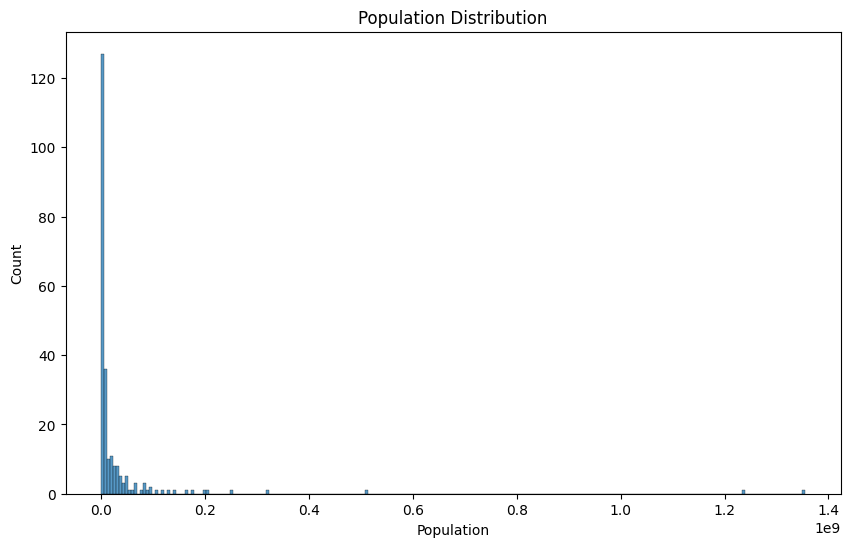

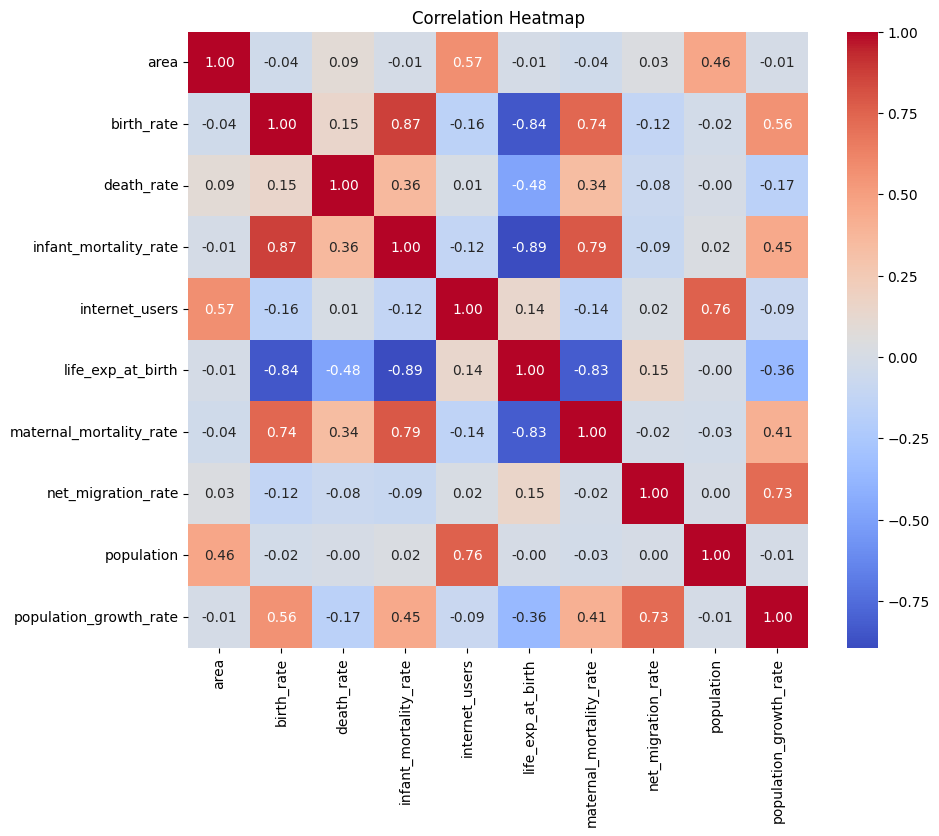

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fd = pd.read_csv('cia_factbook.csv')

numeric_columns = fd.select_dtypes(include=['number'])

print(fd.head())

print(fd.info())

print(fd.describe())

plt.figure(figsize=(10, 6))
sns.histplot(fd['population'])
plt.title('Population Distribution')
plt.xlabel('Population')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## 2. Feature Engineering for Missing Data
TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?

In [15]:
nan_population = fd[fd['population'].isnull()]

print("Countries with NaN values in population:")
print(nan_population[['country', 'population']])

print("\nMain aspect of these countries:")
print(nan_population.describe())

Countries with NaN values in population:
                                           country  population
236                                      Jan Mayen         NaN
237                                 Howland Island         NaN
238              Heard Island and McDonald Islands         NaN
239       South Georgia and South Sandwich Islands         NaN
240                                Spratly Islands         NaN
241                                 Midway Islands         NaN
242                              Clipperton Island         NaN
243                 British Indian Ocean Territory         NaN
244                                 Johnston Atoll         NaN
245                    Ashmore and Cartier Islands         NaN
246                                  Jarvis Island         NaN
247                              Coral Sea Islands         NaN
248            French Southern and Antarctic Lands         NaN
249                                 Navassa Island         NaN
250           

TASK: Notice birth rate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing birth rate values based on the mean value for its country.

In [21]:
missing_birth_rate = fd[fd['birth_rate'].isna()]

mean_birth_rate = fd.groupby('country')['birth_rate'].mean().reset_index()

fd = pd.merge(fd, mean_birth_rate, on='country', suffixes=('', '_mean'))
fd['birth_rate'].fillna(fd['birth_rate_mean'], inplace=True)
fd.drop(columns=['birth_rate_mean'], inplace=True)
fd

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,1.709824e+07,11.870000,13.830000,7.08000,4.085300e+07,70.160000,34.000000,1.690000,1.424703e+08,-0.030000
1,Canada,9.984670e+06,10.290000,8.310000,4.71000,2.696000e+07,81.670000,12.000000,5.660000,3.483484e+07,0.760000
2,United States,9.826675e+06,13.420000,8.150000,6.17000,2.450000e+08,79.560000,21.000000,2.450000,3.188921e+08,0.770000
3,China,9.596960e+06,12.170000,7.440000,14.79000,3.890000e+08,75.150000,37.000000,-0.320000,1.355693e+09,0.440000
4,Brazil,8.514877e+06,14.720000,6.540000,19.21000,7.598200e+07,73.280000,56.000000,-0.150000,2.026568e+08,0.800000
...,...,...,...,...,...,...,...,...,...,...,...
254,Bouvet Island,4.900000e+01,19.659063,7.906978,24.48442,8.311771e+06,71.826875,177.972826,-0.181577,3.229436e+07,1.100858
255,Palmyra Atoll,1.200000e+01,19.659063,7.906978,24.48442,8.311771e+06,71.826875,177.972826,-0.181577,3.229436e+07,1.100858
256,Akrotiri,1.230000e+02,19.659063,7.906978,24.48442,8.311771e+06,71.826875,177.972826,-0.181577,3.229436e+07,1.100858
257,European Union,5.308881e+05,19.659063,7.906978,4.33000,8.311771e+06,80.020000,177.972826,-0.181577,5.114348e+08,1.100858


TASK:Use the same method for the missing values in Life Expectancy at Birth.

In [24]:
missing_life_expectancy = fd[fd['life_exp_at_birth'].isna()]

mean_life_expectancy = fd.groupby('country')['life_exp_at_birth'].mean().reset_index()

fd = pd.merge(fd, mean_life_expectancy, on='country', suffixes=('', '_mean'))
fd['life_exp_at_birth'].fillna(fd['life_exp_at_birth_mean'], inplace=True)
fd.drop(columns=['life_exp_at_birth_mean'], inplace=True)
fd


,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,1.709824e+07,11.870000,13.830000,7.08000,4.085300e+07,70.160000,34.000000,1.690000,1.424703e+08,-0.030000
1,Canada,9.984670e+06,10.290000,8.310000,4.71000,2.696000e+07,81.670000,12.000000,5.660000,3.483484e+07,0.760000
2,United States,9.826675e+06,13.420000,8.150000,6.17000,2.450000e+08,79.560000,21.000000,2.450000,3.188921e+08,0.770000
3,China,9.596960e+06,12.170000,7.440000,14.79000,3.890000e+08,75.150000,37.000000,-0.320000,1.355693e+09,0.440000
4,Brazil,8.514877e+06,14.720000,6.540000,19.21000,7.598200e+07,73.280000,56.000000,-0.150000,2.026568e+08,0.800000
...,...,...,...,...,...,...,...,...,...,...,...
254,Bouvet Island,4.900000e+01,19.659063,7.906978,24.48442,8.311771e+06,71.826875,177.972826,-0.181577,3.229436e+07,1.100858
255,Palmyra Atoll,1.200000e+01,19.659063,7.906978,24.48442,8.311771e+06,71.826875,177.972826,-0.181577,3.229436e+07,1.100858
256,Akrotiri,1.230000e+02,19.659063,7.906978,24.48442,8.311771e+06,71.826875,177.972826,-0.181577,3.229436e+07,1.100858
257,European Union,5.308881e+05,19.659063,7.906978,4.33000,8.311771e+06,80.020000,177.972826,-0.181577,5.114348e+08,1.100858


## 3. Data Feature Preparation
TASK: Create a dummy variable to all categorical data.

In [27]:
fd = pd.get_dummies(fd)

print(fd.info())
fd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Columns: 269 entries, area to country_Zimbabwe
dtypes: bool(259), float64(10)
memory usage: 85.9 KB
None


,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,...,country_Venezuela,country_Vietnam,country_Virgin Islands,country_Wake Island,country_Wallis and Futuna,country_West Bank,country_Western Sahara,country_Yemen,country_Zambia,country_Zimbabwe
0,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03,...,False,False,False,False,False,False,False,False,False,False
1,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76,...,False,False,False,False,False,False,False,False,False,False
2,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77,...,False,False,False,False,False,False,False,False,False,False
3,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44,...,False,False,False,False,False,False,False,False,False,False
4,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80,...,False,False,False,False,False,False,False,False,False,False


TASK: For numerical data perform standard scaler.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = fd.select_dtypes(include=['number'])
scaled_numerical = scaler.fit_transform(numerical_columns)
fd[numerical_columns.columns] = scaled_numerical

scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns.columns)
print("Scaled Numerical Data:")
print(scaled_numerical_df.head())

Scaled Numerical Data:
       area  birth_rate  death_rate  infant_mortality_rate  internet_users  \
0  9.820524   -0.868111    2.137287              -0.779005        1.073438   
1  5.603858   -1.044206    0.145428              -0.885083        0.615150   
2  5.510204   -0.695359    0.087693              -0.819735        7.807642   
3  5.374037   -0.834675   -0.168506              -0.433913       12.557774   
4  4.732618   -0.550471   -0.493266              -0.236078        2.232240   

   life_exp_at_birth  maternal_mortality_rate  net_migration_rate  population  \
0          -0.204171                -0.652472            0.181833    0.901918   
1           1.205657                -0.752174            0.567537    0.020797   
2           0.947209                -0.711387            0.255670    2.346136   
3           0.407040                -0.638876           -0.013448   10.833553   
4           0.177989                -0.552770            0.003068    1.394615   

   population_growth_

## 4. Creating and Fitting Kmeans Model
TASK:
- Plot the within sum of squares vs. the number of cluster and find the optimal number of clusters.
- Fit a k-means model of the optimum cluster.

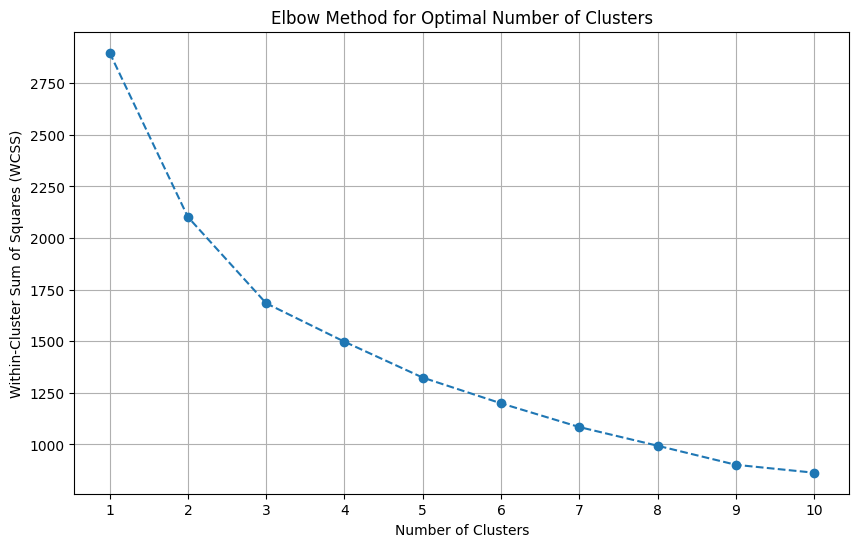

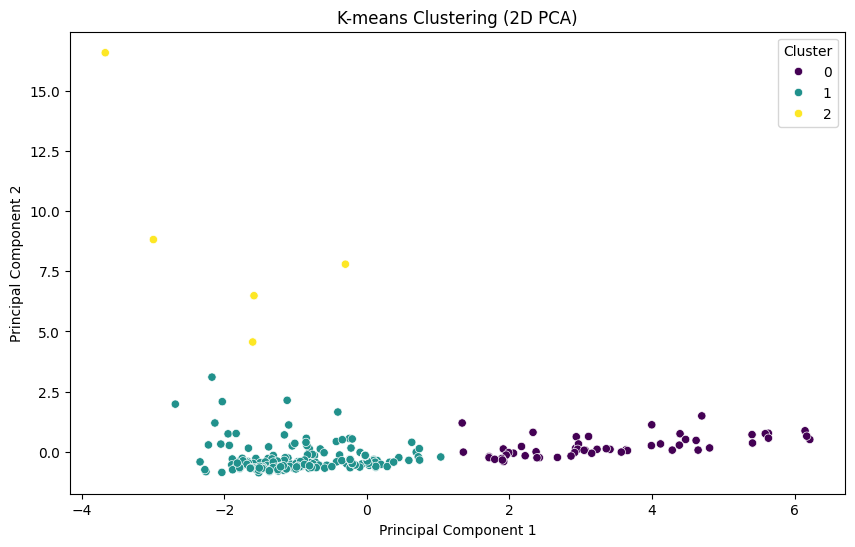

In [31]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(fd)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42, n_init=10)
kmeans.fit(fd)

fd['cluster'] = kmeans.labels_

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(fd)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=fd['cluster'], palette='viridis')
plt.title('K-means Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

## 5. Model Interpretation
TASK: What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices.

#### Selecting K=3 makes sense because it indicates a threshold at which the WCSS may not be further reduced by adding more clusters, indicating clear groupings within the data without unduly intricate subdivisions. This decision is in line with the goal of including more comprehensive patterns or significant categories in the collection, like demographic traits, economic indicators, and potentially geographic or political variables.

#### However, if there is a more obvious slowdown in WCSS decrease at K=4 and a less noticeable elbow at K=3, then taking K=4 into consideration could be valid. This situation can point to more nuanced subgroups or aspects of the data that are worth analyzing. These more detailed divisions may be associated with particular sub-demographics, socioeconomic classes, geographical variances, or political boundaries.